sampled


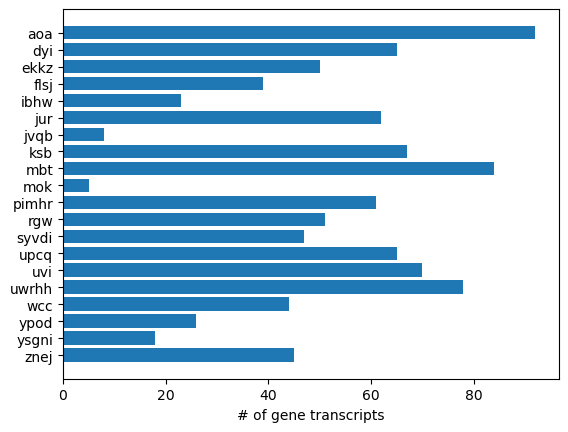

real


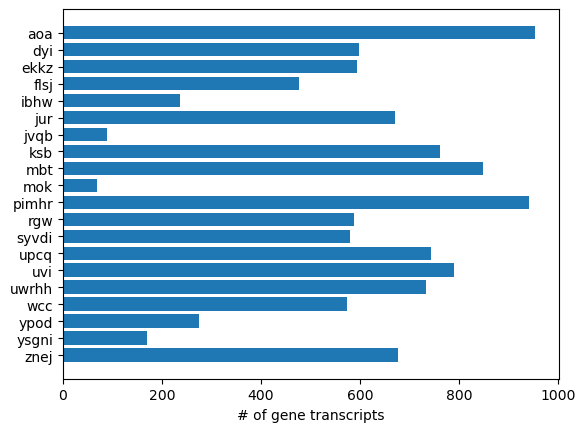

In [28]:
from random import choices
import numpy
import os
import pathlib
import matplotlib.pyplot as plt
import random, string
import re


# helper function to create random words
def random_word(length):
    letters = string.ascii_lowercase
    actual_length = numpy.random.randint(low = 3, high = length, size = 1)[0]
    return ''.join(random.choice(letters) for i in range(actual_length))


# helper function
def dict_to_list(_dict):
    objects = []
    weights = []
    for _object, weight in sorted(_dict.items()):
        objects.append(_object)
        weights.append(weight)

    return objects, weights


# create a file with random gene names and random transcription numbers, since we don't have any actual input data
def create_gene_file(name, directory, number):
    file_name = os.path.join(directory, name)
    with open(file_name, "a") as file:
        for i in range(number):
            _string = "{} {} \n".format(random_word(6), numpy.random.randint(low = 10, high = 1000, size = 1)[0])
            file.write(_string)
        
    return file_name


# convert the file with gene names and transcription numbers into a dict
def read_avg_expression(file):
    dict_transcr = {}
    with open(file, "r") as dafile:
        data = dafile.readlines()
        for i in range(len(data)):
            data[i] = data[i].strip()
            number = int(re.findall(r'\d+', data[i])[0]) # goofy
            gene = data[i].split()[0]
            dict_transcr[gene] = number

    return dict_transcr


# probabilistically sample from the gene transcripts
def sample_transcripts(avgs, number):
    objects, weights = dict_to_list(avgs)
    sample_array = choices(population = objects,
                           weights = weights,
                           k = number)
    unique, counts = numpy.unique(sample_array, return_counts=True)
    new_dict = {key : value for key, value in zip(list(unique), list(counts))}
    
    return new_dict




def plot_rotated(x, y):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = numpy.arange(len(x))
    number = y

    ax.barh(y_pos, number, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(x)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('# of gene transcripts')

    plt.show()
    
# plot sampled frequencies
print("sampled")
plot_rotated(x = dictToList(sampled_dict)[0],
             y = dictToList(sampled_dict)[1])

# plot real frequencies
print("real")
plot_rotated(x = dictToList(dict_genes)[0],
             y = dictToList(dict_genes)[1])



current_file = "ReviewPython.ipynb"
directory = str(pathlib.Path(current_file).parent.resolve())


def write_sample(input_file_name, sampled_file_name, number_genes, number_sampled, directory):
    """write the sampled dict into a file with chosen name

    Extended description of function.

    Args:
        input_file_name (str): name of the input file
        sampled_file_name (str): name of the output file
        number_genes (int): number of genes you want in your input file
        number_sampled (int): number of times you want to sample from your input file
        directory (str): directory where the produced files get placed
        
    Returns:
        Returns the output file's name
    """
    
    file_name = os.path.join(directory, sampled_file_name)
    file = create_gene_file(input_file_name, directory, number_genes)
    number_dict = read_avg_expression(file)
    sampled_dict = sample_transcripts(number_dict, number_sampled)
    
    with open(file_name, "w") as file:
        file.write(str(sampled_dict))
        
    print(file_name)
    return file_name

In [23]:
file = create_gene_file("file_name.txt",
                 pathlib.Path().resolve(),
                 20)

In [24]:
assert os.path.isfile(file)

In [25]:
assert isinstance(read_avg_expression(file), dict)

In [ ]:
assert isinstance(sample_transcripts(_dict, 1000), dict)

In [53]:
sample_file = write_sample("file_name.txt", "sample_file.txt", 20, 1000, pathlib.Path().resolve())

/Users/noepozzan/Documents/unibas/programming_life_sciences/noteboooks/sample_file.txt


In [77]:
from click.testing import CliRunner
from TranscriptSampler.cli import write_sample

In [92]:
runner = CliRunner()
result = runner.invoke(write_sample)

In [93]:
assert result.output.strip() == os.path.join(pathlib.Path().resolve(), "sampled_transcripts.txt")
assert result.exit_code == 0

In [94]:
result.output

'/Users/noepozzan/Documents/unibas/programming_life_sciences/noteboooks/sampled_transcripts.txt\n'

In [59]:
sample_file = write_sample("file_name.txt", "sample_file.txt", 20, 1000, pathlib.Path().resolve())

/Users/noepozzan/Documents/unibas/programming_life_sciences/noteboooks/sample_file.txt


In [62]:
sample_file

'/Users/noepozzan/Documents/unibas/programming_life_sciences/noteboooks/sample_file.txt'

In [60]:
with open(sample_file, "r") as f:
    data = f.read()
asti = ast.literal_eval(data)

In [63]:
_sum = 0
for item, number in asti.items():
    _sum += number
assert os.path.isfile(sample_file)
assert _sum == 1000